## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results

# Combine the data into a single dataset

mouse_data_study = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview

mouse_data_study



Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.

mouse_total = len(mouse_data_study["Mouse ID"].unique())

mouse_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouseID_list = mouse_data_study[["Mouse ID","Timepoint"]]

mouseID_list= pd.DataFrame(mouseID_list)

mouseID_list["is_duplicate"] = mouseID_list.duplicated(keep = False)

mouseID_dupli_list = mouseID_list[(mouseID_list["is_duplicate"] != False)]
                                   
mouseID_duplicateList = mouseID_dupli_list["Mouse ID"].unique()

mouseID_duplicateList

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouseID_dupli_details = mouse_data_study[(mouse_data_study["Mouse ID"] == "g989")]

mouseID_dupli_details           

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mousestudy_cleandata = mouse_data_study[(mouse_data_study["Mouse ID"] != "g989")]


len(mousestudy_cleandata)

1880

In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_count = len(mousestudy_cleandata["Mouse ID"].unique())

mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_data = mousestudy_cleandata.groupby(["Drug Regimen"])
regimen_list= mousestudy_cleandata["Drug Regimen"].unique()

mean_regimen = regimen_data["Tumor Volume (mm3)"].mean()
median_regimen = regimen_data["Tumor Volume (mm3)"].median()
Variance_regimen = regimen_data["Tumor Volume (mm3)"].var()
STD_regimen = regimen_data["Tumor Volume (mm3)"].std()
sems_regimen = regimen_data["Tumor Volume (mm3)"].sem()



# sems_regimen = [sem(regimen_data["Tumor Volume (mm3)"])

Regimen_Summary = pd.DataFrame({"Drug Name": regimen_list, "Average of Tumor Volume (mm3)": mean_regimen, 
                                "Median of  Tumor Volume (mm3)": median_regimen, 
                                "Variance of  Tumor Volume (mm3)":Variance_regimen,
                                "STD of  Tumor Volume (mm3)":STD_regimen,
                                "Standard Error of  Tumor Volume (mm3)":sems_regimen} )

del Regimen_Summary["Drug Name"]

Regimen_Summary

print(f"COMMENTS:")
print(f"Capomulin is out of two Drug regimen having lowest Tumor growth volume, but has little higher ratios of variance, STD and") 
print(f"standard error of Tumor Volume than Ramicane. Capomulin is still perform much better than 8 other drug regimen.")



COMMENTS:
Capomulin is out of two Drug regimen having lowest Tumor growth volume, but has little higher ratios of variance, STD and
standard error of Tumor Volume than Ramicane. Capomulin is still perform much better than 8 other drug regimen.


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggreation_result = regimen_data["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

aggreation_result


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

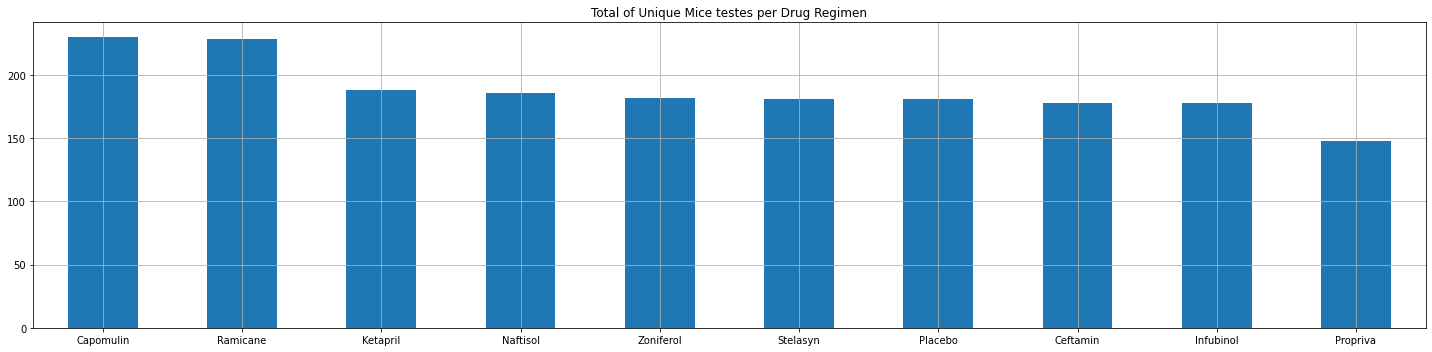

COMMENTS:
Capomulin & Ramicane have highest number of unique mice tested. so, their results seem more reliable.


In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_mousestudy_data = mousestudy_cleandata[["Drug Regimen", "Mouse ID"]]
                            

mouseIDcount_per_regimen = regimen_mousestudy_data["Drug Regimen"].value_counts()


mouseIDcount_per_regimen.plot.bar(legend=False, figsize=(20,5), rot =0)

plt.title("Total of Unique Mice testes per Drug Regimen")

plt.tight_layout()

plt.grid(True)
plt.show()


mouseIDcount_per_regimen

print(f"COMMENTS:")
print("Capomulin & Ramicane have highest number of unique mice tested. so, their results seem more reliable.")


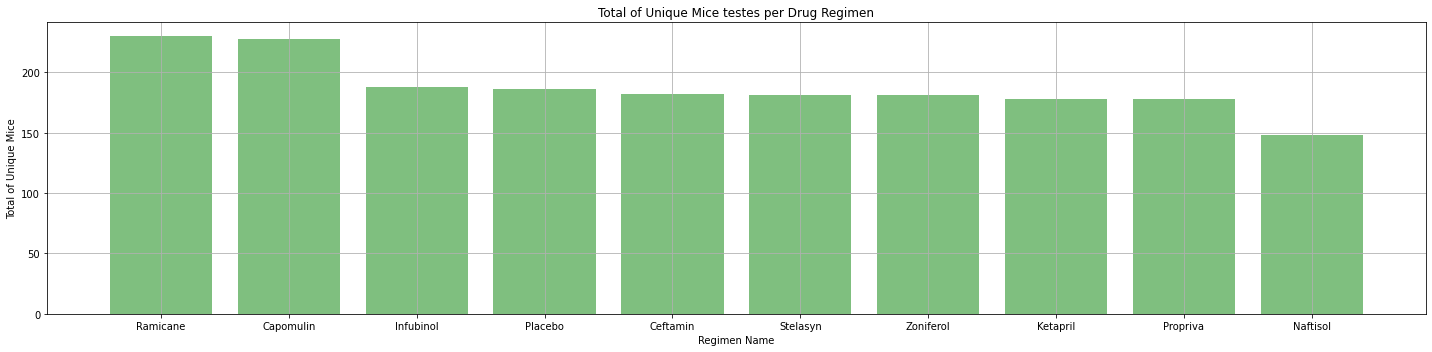

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(regimen_list))
tick_regimens = [value for value in x_axis]

plt.figure(figsize=(20,5))
plt.bar(x_axis, mouseIDcount_per_regimen, color='g', alpha=0.5, align="center")
plt.xticks(tick_regimens, regimen_list, rotation="horizontal")

plt.title("Total of Unique Mice testes per Drug Regimen")
plt.xlabel("Regimen Name")
plt.ylabel("Total of Unique Mice")

plt.tight_layout()

plt.grid(True)
plt.show()


COMMENTS:
the distribution of male and female is allocated close to equally,
hence it is can say that there is no effect of sex in test performance.


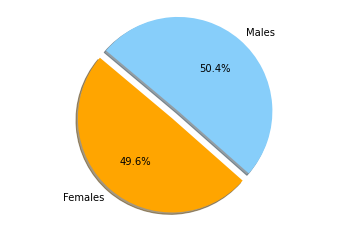

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot pandas

mousesex_data = mousestudy_cleandata[["Mouse ID", "Sex"]]
                            
mousesex_unique = mousesex_data.drop_duplicates(keep="last") 
mousesex_unique = mousesex_unique.groupby(["Sex"])
mousesex_count= mousesex_unique["Mouse ID"].count()

labels = ["Females", "Males"]

sizes = mousesex_count

colors = ["orange", "lightskyblue"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.savefig('piechart1')

print(f"COMMENTS:")
print(f"the distribution of male and female is allocated close to equally,") 
print(f"hence it is can say that there is no effect of sex in test performance.")

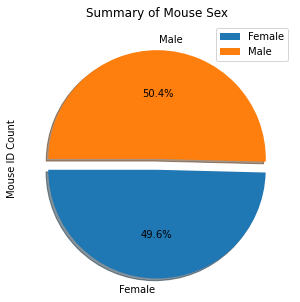

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using  pandas

sex_summary = pd.DataFrame({"Sex":labels, "Mouse ID Count": mousesex_count})

explode = (0.1, 0)

mousesex_pie = sex_summary.plot.pie(y='Mouse ID Count', explode = explode, figsize=(5, 5), autopct="%1.1f%%",shadow=True, startangle=180 )
mousesex_pie.set_title("Summary of Mouse Sex")
mousesex_pie.set_ylabel("Mouse ID Count")

plt.show()

plt.savefig('piechart2')

## Quartiles, Outliers and Boxplots

In [13]:
#CODE 01
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

bestregime_study = mousestudy_cleandata[mousestudy_cleandata["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse

bestregimen_lastpoint = bestregime_study.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

bestregimen_lastmerge = pd.merge(bestregimen_lastpoint, mousestudy_cleandata, on=("Mouse ID","Timepoint"),how="left")
bestregimen_lastmerge = bestregimen_lastmerge.rename(columns= {"Timepoint":"Last Timepoint"})

bestregimen_tumorvol = bestregimen_lastmerge[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Last Timepoint"]]



In [14]:
# CODE 01
# Put treatments into a list for for loop (and later for plot labels)

regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumorvol_perregimen = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes & add subset:
    
for regimen in regimen_list:
    
         
    tumorvol_perregimen.append(bestregimen_tumorvol.loc[bestregimen_tumorvol["Drug Regimen"] == regimen,
                                                         "Tumor Volume (mm3)"]) 

# Determine outliers using upper and lower bounds

    regimen_outliers = []
    regimenlen_outliers = []
    
    for x in tumorvol_perregimen:

        quartiles = x.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)

                              
    print(f"{regimen} potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
print('COMMENTS:')
print(f"Capomulin and Ramicane have tighest range of lower and upper bounds. So if there is no or acceptable numbers of outliers")
print(f"are found, the drug regimens results disperse closely around the mean/median at more consistant distances")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.
COMMENTS:
Capomulin and Ramicane have tighest range of lower and upper bounds. So if there is no or acceptable numbers of outliers
are found, the drug regimens results disperse closely around the mean/median at more consistant distances


In [15]:
# CODE 02
capomulin_df = mousestudy_cleandata.loc[mousestudy_cleandata["Drug Regimen"] =="Capomulin",:]
ramicane_df = mousestudy_cleandata.loc[mousestudy_cleandata["Drug Regimen"] =="Ramicane",:]
infubinol_df = mousestudy_cleandata.loc[mousestudy_cleandata["Drug Regimen"] =="Infubinol",:]
ceftamin_df = mousestudy_cleandata.loc[mousestudy_cleandata["Drug Regimen"] =="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse

capomulin_lastpoint = capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()
ramicane_lastpoint = ramicane_df.groupby(["Mouse ID"])["Timepoint"].max()
infubinol_lastpoint = infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()
ceftamin_lastpoint = ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_lastmerge = pd.merge(capomulin_lastpoint, mousestudy_cleandata, on=("Mouse ID","Timepoint"),how="left")
capomulin_lastmerge = capomulin_lastmerge.rename(columns= {"Timepoint":"Last Timepoint"})

ramicane_lastmerge = pd.merge(ramicane_lastpoint, mousestudy_cleandata, on=("Mouse ID","Timepoint"),how="left")
ramicane_lastmerge = ramicane_lastmerge.rename(columns= {"Timepoint":"Last Timepoint"})

infubinol_lastmerge = pd.merge(infubinol_lastpoint, mousestudy_cleandata, on=("Mouse ID","Timepoint"),how="left")
infubinol_lastmerge = infubinol_lastmerge.rename(columns= {"Timepoint":"Last Timepoint"})

ceftamin_lastmerge = pd.merge(ceftamin_lastpoint, mousestudy_cleandata, on=("Mouse ID","Timepoint"),how="left")
ceftamin_lastmerge = ceftamin_lastmerge.rename(columns= {"Timepoint":"Last Timepoint"})


In [16]:
# CODE 02
# Capomulin:

tumorvol_capomulin = capomulin_lastmerge["Tumor Volume (mm3)"]

quartiles = tumorvol_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound_capomulin = lowerq - (1.5*iqr)
upper_bound_capomulin = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound_capomulin} and above {upper_bound_capomulin} could be outliers.")

# Ramicane:
tumorvol_ramicane = ramicane_lastmerge["Tumor Volume (mm3)"]

quartiles = tumorvol_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound_ramicane = lowerq - (1.5*iqr)
upper_bound_ramicane = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could be values below {lower_bound_ramicane} and above {upper_bound_ramicane} could be outliers.")

# Infubinol:
tumorvol_infubinol = infubinol_lastmerge["Tumor Volume (mm3)"]

quartiles = tumorvol_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound_infubinol = lowerq - (1.5*iqr)
upper_bound_infubinol = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {lower_bound_infubinol} and above {upper_bound_infubinol} could be outliers.")

# Ceftamin:
tumorvol_ceftamin = ceftamin_lastmerge["Tumor Volume (mm3)"]

quartiles = tumorvol_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound_ceftamin = lowerq - (1.5*iqr)
upper_bound_ceftamin = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {lower_bound_ceftamin} and above {upper_bound_ceftamin} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [17]:
# CODE 02
# liST OF records per Drug Regimen can be outliers:

capomulin_outliers = capomulin_lastmerge.loc[(capomulin_lastmerge["Tumor Volume (mm3)"] > upper_bound_capomulin) 
                                             | (capomulin_lastmerge["Tumor Volume (mm3)"] < lower_bound_capomulin) ,:]
capomulin = len(capomulin_outliers)

ramicane_outliers = ramicane_lastmerge.loc[(ramicane_lastmerge["Tumor Volume (mm3)"] > upper_bound_ramicane) 
                                           | (ramicane_lastmerge["Tumor Volume (mm3)"] < lower_bound_ramicane) ,:]
ramicane = len(ramicane_outliers)

infubinol_outliers = infubinol_lastmerge.loc[(infubinol_lastmerge["Tumor Volume (mm3)"] > upper_bound_infubinol) 
                                             | (infubinol_lastmerge["Tumor Volume (mm3)"] < lower_bound_infubinol) ,:]
infubinol = len(infubinol_outliers)

ceftamin_outliers = ceftamin_lastmerge.loc[(ceftamin_lastmerge["Tumor Volume (mm3)"] > upper_bound_ceftamin) 
                                           | (ceftamin_lastmerge["Tumor Volume (mm3)"] < lower_bound_ceftamin) ,:]
ceftamin = len(ceftamin_outliers)

outliers_list = [capomulin,ramicane,infubinol,ceftamin]
outliers_list

print('COMMENTS:')
print('Infubinol has 01 outlier. We can double check whether it is outlier of upper or lower bound.')


COMMENTS:
Infubinol has 01 outlier. We can double check whether it is outlier of upper or lower bound.


In [18]:
infubinol_outliers

Mouse ID  Last Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
5     c326               5    Infubinol  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites  
5           36.321346                 0

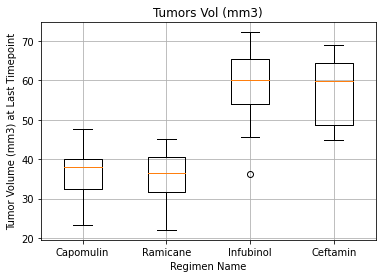

COMMENTS:
Infubinol has 01 outlier in lower bound whereas other three regimen are all in the range of lower-upper bounds of quartiles.
it can conclude that Capolumin & Ramicane have more reliable test results


In [19]:
# CODE 01
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

TumorsVol_boxplot = tumorvol_perregimen

fig, axis = plt.subplots()
axis.set_title("Tumors Vol (mm3)")
axis.set_ylabel("Tumor Volume (mm3) at Last Timepoint")
axis.set_xlabel("Regimen Name")

axis.boxplot(TumorsVol_boxplot, labels=regimen_list)

plt.savefig('boxplot')

plt.grid(True)
plt.show()




print('COMMENTS:')
print('Infubinol has 01 outlier in lower bound whereas other three regimen are all in the range of lower-upper bounds of quartiles.')
print('it can conclude that Capolumin & Ramicane have more reliable test results')

## Line and Scatter Plots

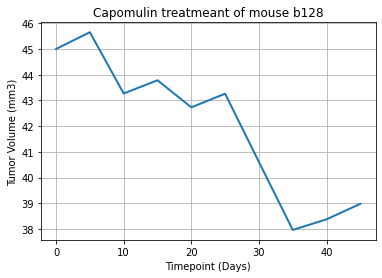

COMMENTS:
It seems kindly that the turmor growth volumn decrease when the timepoint increase.
That is when application time is longer, the signal that drug regimen turn to be more effectively controlling over the tumor growth.


In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = mousestudy_cleandata.loc[mousestudy_cleandata["Drug Regimen"] =="Capomulin",:]
capomulin_lastpoint = capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()
capomulin_lastmerge = pd.merge(capomulin_lastpoint, mousestudy_cleandata, on=("Mouse ID","Timepoint"),how="left")
capomulin_lastmerge = capomulin_lastmerge.rename(columns= {"Timepoint":"Last Timepoint"})

mouseID = "b128"

mouseID_sole_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == mouseID,:]

x_timepoint = mouseID_sole_capomulin["Timepoint"]
y_turmorvol = mouseID_sole_capomulin["Tumor Volume (mm3)"]

plt.title(f'Capomulin treatmeant of mouse {mouseID}')
plt.plot(x_timepoint, y_turmorvol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')

plt.grid(True)
plt.show()

print('COMMENTS:')
print('It seems kindly that the turmor growth volumn decrease when the timepoint increase.')
print('That is when application time is longer, the signal that drug regimen turn to be more effectively controlling over the tumor growth.')


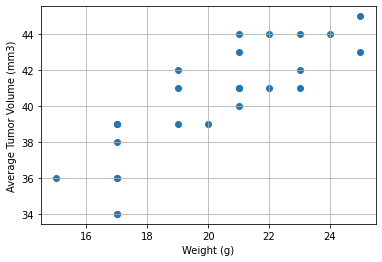

COMMENTS:
At first glance, the tumor growth rate correlates positively with mouse weight.


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


MouseID_group = capomulin_df.groupby(["Mouse ID"])

MouseID_Weight = MouseID_group["Weight (g)"].unique().astype(int)

MouseID_TumorVol_average = MouseID_group["Tumor Volume (mm3)"].mean().astype(int)

plt.scatter(MouseID_Weight, MouseID_TumorVol_average)

plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')

plt.grid(True)
plt.show()

print('COMMENTS:')
print('At first glance, the tumor growth rate correlates positively with mouse weight.')


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight_tumorvol_avg_df = pd.DataFrame({"Weight (g)": MouseID_Weight, "Average Tumor Vol (mm3)": MouseID_TumorVol_average})

corr=round(st.pearsonr(weight_tumorvol_avg_df["Weight (g)"],weight_tumorvol_avg_df["Average Tumor Vol (mm3)"])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {corr}")

print('COMMENTS:')
print('The coorelation coefficiency ratio (close to +1.0) reconfirms the visual finding that tumor growth rate correlates positively and greatly strong with mouse weight.')

The correlation between mouse weight and average tumor volume is 0.84
COMMENTS:
The coorelation coefficiency ratio (close to +1.0) reconfirms the visual finding that tumor growth rate correlates positively and greatly strong with mouse weight.


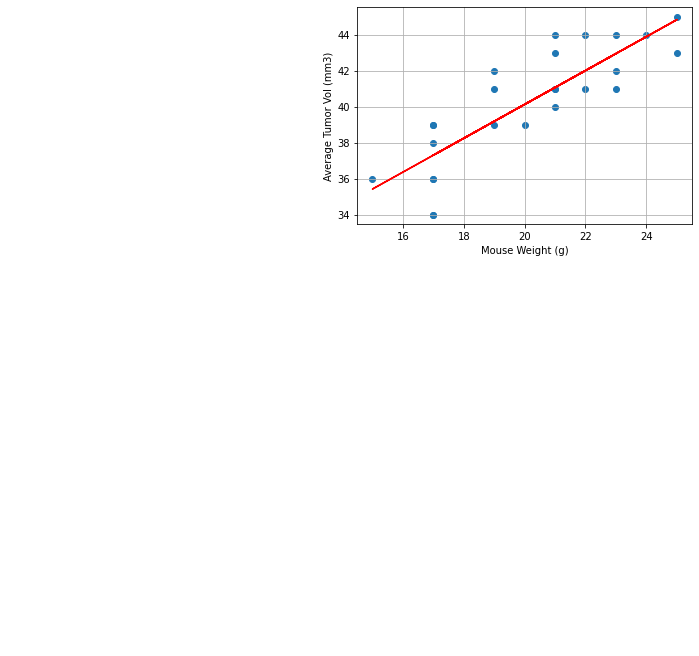

In [23]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight_tumorvol_avg_df["Weight (g)"]
y_values = weight_tumorvol_avg_df["Average Tumor Vol (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (3,10), fontsize=15,color="red")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Vol (mm3)')

plt.grid(True)

plt.show()

